**Preprosesing data**


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
# Mount Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
data_path = '/content/drive/My Drive/data1.csv'

# Memuat data dari file CSV
data = pd.read_csv(data_path, encoding='latin-1')

# Menampilkan data
data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,01/01/2000,24.1,69.0,82.0,5.4,2.0
1,02/01/2000,22.9,77.0,0.0,1.2,4.0
2,03/01/2000,23.8,78.0,14.0,4.1,3.0
3,04/01/2000,24.2,77.0,10.0,1.3,2.0
4,05/01/2000,23.4,78.0,8888.0,3.6,4.0
5,06/01/2000,24.0,80.0,2.0,4.6,3.0
6,07/01/2000,22.9,80.0,4.0,3.0,3.0
7,08/01/2000,23.3,76.0,0.0,0.0,2.0
8,09/01/2000,23.0,74.0,2.0,4.1,3.0
9,10/01/2000,22.9,73.0,4.0,4.9,NaN


In [ ]:
# Convert 'Tanggal' to datetime format
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')

In [ ]:
#Hitung data hilang
data.isna().sum()

,0
Tanggal,0
Tavg (°C),33
RH_avg (%),36
RR (mm),217
ss (jam),53
ff_avg (m/s),437


In [ ]:
# Handle missing values
data = data.ffill().bfill()

In [ ]:
data.isna().sum()

,0
Tanggal,0
Tavg (°C),0
RH_avg (%),0
RR (mm),0
ss (jam),0
ff_avg (m/s),0


In [ ]:
data

,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,2000-01-01,24.1,69.0,82.0,5.4,2.0
1,2000-01-02,22.9,77.0,0.0,1.2,4.0
2,2000-01-03,23.8,78.0,14.0,4.1,3.0
3,2000-01-04,24.2,77.0,10.0,1.3,2.0
4,2000-01-05,23.4,78.0,8888.0,3.6,4.0
...,...,...,...,...,...,...
8760,2023-12-27,25.9,78.0,25.3,5.5,1.0
8761,2023-12-28,25.4,86.0,29.3,4.5,1.0
8762,2023-12-29,27.1,79.0,27.5,5.4,2.0
8763,2023-12-30,26.1,82.0,1.4,8.7,2.0


In [ ]:
# Fungsi untuk menggantikan outlier menggunakan metode Z-score
from scipy.stats import zscore

def replace_outliers_zscore(df, columns):
    # Iterasi untuk setiap kolom yang akan diperiksa
    for column in columns:
        # Menghitung Z-score untuk kolom yang dipilih
        df['zscore'] = zscore(df[column])
        # Menghitung nilai median dari kolom yang dipilih
        median = df[column].median()
        # Menggantikan nilai yang memiliki Z-score lebih dari 3 dengan nilai median
        df[column] = np.where(np.abs(df['zscore']) > 3, median, df[column])
        # Menghapus kolom zscore setelah selesai
        df.drop(columns='zscore', inplace=True)
    return df

# Daftar kolom yang akan diperiksa outlier-nya
columns_to_check = ['Tavg (°C)', 'RH_avg (%)', 'ss (jam)', 'ff_avg (m/s)', 'RR (mm)']

# Menggantikan outlier di semua kolom yang dipilih
data = replace_outliers_zscore(data, columns_to_check)
data


,Tanggal,Tavg (°C),RH_avg (%),RR (mm),ss (jam),ff_avg (m/s)
0,2000-01-01,24.1,69.0,82.0,5.4,2.0
1,2000-01-02,22.9,77.0,0.0,1.2,4.0
2,2000-01-03,23.8,78.0,14.0,4.1,3.0
3,2000-01-04,24.2,77.0,10.0,1.3,2.0
4,2000-01-05,23.4,78.0,0.0,3.6,4.0
...,...,...,...,...,...,...
8760,2023-12-27,25.9,78.0,25.3,5.5,1.0
8761,2023-12-28,25.4,86.0,29.3,4.5,1.0
8762,2023-12-29,27.1,79.0,27.5,5.4,2.0
8763,2023-12-30,26.1,82.0,1.4,8.7,2.0


In [ ]:
# Menghitung korelasi Pearson
features = data.columns.drop(['Tanggal', 'RR (mm)'])
correlation_matrix = data[features].corrwith(data['RR (mm)'])
print(correlation_matrix.sort_values(ascending=False))

RH_avg (%)      0.326558
Tavg (°C)       0.040954
ff_avg (m/s)   -0.181402
ss (jam)       -0.257047
dtype: float64


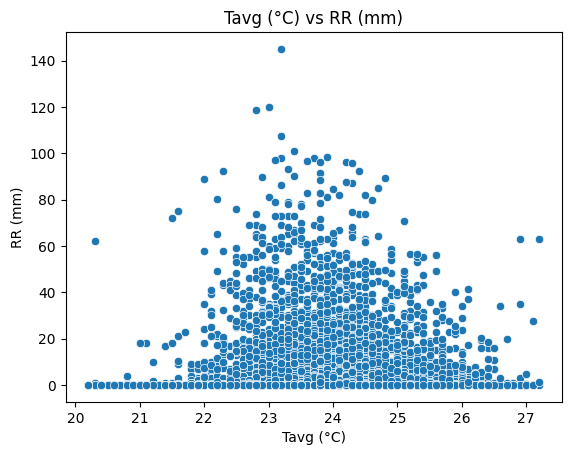

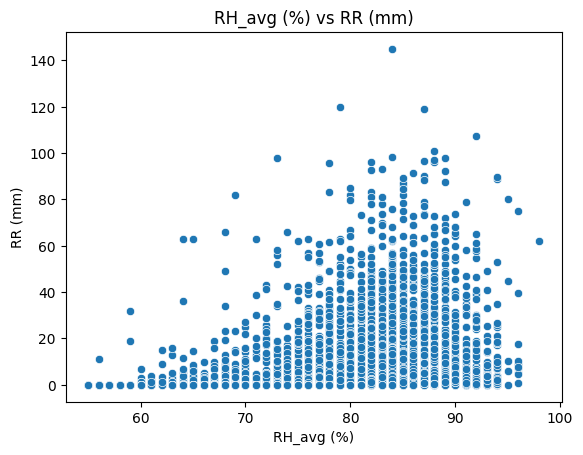

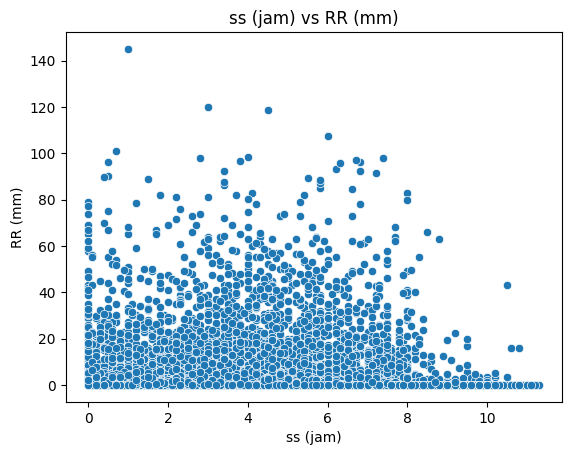

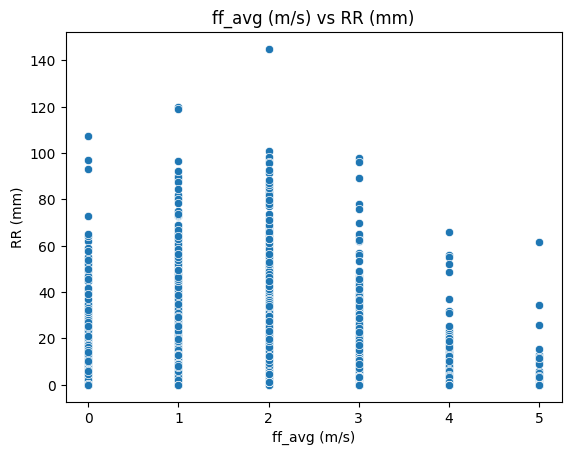

In [ ]:
# Menampilkan scatter plot untuk semua fitur terhadap RR
import matplotlib.pyplot as plt
import seaborn as sns
for feature in features:
    sns.scatterplot(data=data, x=feature, y='RR (mm)')
    plt.title(f'{feature} vs RR (mm)')
    plt.show()

# Menghapus fitur yang kurang berkorelasi 'ss' and 'ff_avg'
data = data.drop(columns=[ 'Tanggal','ss (jam)', 'ff_avg (m/s)',])

# Menyimpan data final ke Google Drive
final_data_path = '/content/drive/My Drive/final_data.csv'
data.to_csv(final_data_path, index=False)

In [ ]:
# Path ke file CSV di Google Drive
final_data_path = '/content/drive/My Drive/final_data.csv'

# Memuat data dari file CSV
data = pd.read_csv(final_data_path)

# Menampilkan data
data

,Tavg (°C),RH_avg (%),RR (mm)
0,24.1,69.0,82.0
1,22.9,77.0,0.0
2,23.8,78.0,14.0
3,24.2,77.0,10.0
4,23.4,78.0,0.0
...,...,...,...
8760,25.9,78.0,25.3
8761,25.4,86.0,29.3
8762,27.1,79.0,27.5
8763,26.1,82.0,1.4


In [ ]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_columns = ['Tavg (°C)', 'RH_avg (%)', 'RR (mm)']
data[feature_columns] = scaler.fit_transform(data[feature_columns])
data.head(7)


,Tavg (°C),RH_avg (%),RR (mm)
0,0.557143,0.325581,0.565517
1,0.385714,0.511628,0.000000
2,0.514286,0.534884,0.096552
3,0.571429,0.511628,0.068966
4,0.457143,0.534884,0.000000
5,0.542857,0.581395,0.013793
6,0.385714,0.581395,0.027586


In [ ]:
# Definisikan jumlah timestep
timesteps = 7

# Fungsi untuk membuat dataset baru dengan lagging berdasarkan timestep
def create_lagged_features(data, timesteps):
    X, y = [], []
    # Loop untuk membuat fitur lagging
    for i in range(len(data) - timesteps):
        # Membuat data input (X) dengan ukuran timestep
        X.append(data[i:(i + timesteps), :])
        # Menentukan target output (y), dalam hal ini curah hujan (RR (mm))
        y.append(data[i + timesteps, -1])  # Target adalah curah hujan (RR (mm))
    return np.array(X), np.array(y)

# Pilih kolom fitur yang akan dilagging, termasuk curah hujan (RR (mm))
features = data[['Tavg (°C)', 'RH_avg (%)', 'RR (mm)']].values

# Buat fitur lagged berdasarkan timestep yang telah ditentukan
X, y = create_lagged_features(features, timesteps)


In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (8758, 7, 3)
Shape of y: (8758,)


In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan data menjadi training (80%) dan temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
# Pisahkan temporary menjadi validation (10%) dan test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7006, 7, 3)
Shape of y_train: (7006,)
Shape of X_val: (876, 7, 3)
Shape of y_val: (876,)
Shape of X_test: (876, 7, 3)
Shape of y_test: (876,)


In [ ]:
import numpy as np
import pandas as pd

# Misalkan X_test sudah ada
# Reshape data menjadi bentuk (sequence, timesteps * features)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
X_test_df = pd.DataFrame(X_test_flattened, columns=[f'Feature_{i}' for i in range(X_test_flattened.shape[1])])

# Simpan ke CSV
X_test_df.to_csv('X_test.csv', index=False)


**Perancangan model**

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dropout, Attention, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fungsi untuk membangun model dengan fungsi aktivasi yang dapat disesuaikan
def build_model(activation_function):
    # Definisikan lapisan input sesuai dengan bentuk data latih
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # Lapisan LSTM pertama dengan dropout dan regularisasi L2 untuk mengurangi overfitting
    lstm_out = LSTM(units=128, activation=activation_function, return_sequences=True,
                    kernel_regularizer=tf.keras.regularizers.l2(1e-4))(inputs)
    lstm_out = Dropout(rate=0.3)(lstm_out)

    # Lapisan LSTM kedua dengan dropout dan regularisasi L2 untuk mengurangi overfitting
    lstm_out = LSTM(units=128, activation=activation_function, return_sequences=True,
                    kernel_regularizer=tf.keras.regularizers.l2(1e-4))(lstm_out)
    lstm_out = Dropout(rate=0.3)(lstm_out)

    # Lapisan Attention untuk menangkap informasi penting dari output LSTM
    attention = Attention()([lstm_out, lstm_out])

    # Meratakan output dari lapisan Attention agar dapat digunakan sebagai input ke lapisan Dense
    attention = Flatten()(attention)

    # Lapisan Output untuk prediksi curah hujan (rainfall)
    rainfall_output = Dense(1, name='rainfall')(attention)

    # Membuat dan mengompilasi model dengan optimizer Adam dan loss mean squared error
    model = Model(inputs, rainfall_output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])

    return model


**Training Model**

In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Mount Google Drive untuk menyimpan model dan hasil pelatihan
drive.mount('/content/drive')

# Parameter yang digunakan dalam eksperimen
activation_function = 'tanh'
batch_sizes = [4, 16, 32, 64, 128]
epochs_list = [10, 20, 50, 100]

# DataFrame untuk mencatat hasil pelatihan
results_df = pd.DataFrame(columns=['Activation', 'Batch Size', 'Epochs', 'Train MSE', 'Train RMSE', 'Validation MSE', 'Validation RMSE'])
histories = {}

# Fungsi untuk menyimpan dan memuat history pelatihan
def save_history_to_csv(history, filename):
    pd.DataFrame(history.history).to_csv(filename, index=False)

def load_history_from_csv(filename):
    history_df = pd.read_csv(filename)
    return history_df.to_dict(orient='list')

# Fungsi untuk menyimpan hasil sementara ke Google Drive
def save_intermediate_results(results_df):
    results_df.to_csv("/content/drive/My Drive/models/training_results.csv", index=False)
    print("Hasil sementara disimpan ke training_results.csv di Google Drive.")

# Loop untuk mencoba berbagai kombinasi parameter batch_size dan epochs
for batch_size in batch_sizes:
    for epochs in epochs_list:
        try:
            print(f"Memproses activation={activation_function}, batch_size={batch_size}, epochs={epochs}")

            # Path untuk menyimpan model dan history pelatihan
            save_path = f"/content/drive/My Drive/models/best_model_{activation_function}_bs{batch_size}_ep{epochs}.keras"
            history_path = f"/content/drive/My Drive/models/history_{activation_function}_bs{batch_size}_ep{epochs}.csv"

            # Jika model dan history sudah ada, muat kembali untuk menghemat waktu
            if os.path.exists(save_path) and os.path.exists(history_path):
                print(f"Memuat model dan history dari {save_path} dan {history_path}")
                model = load_model(save_path)
                history_dict = load_history_from_csv(history_path)
                history = tf.keras.callbacks.History()
                history.history = history_dict
                histories[f'{activation_function}_{batch_size}_{epochs}'] = history
            else:
                # Latih model jika belum ada model atau history yang tersimpan
                print(f"Melatih dengan activation={activation_function}, batch_size={batch_size}, epochs={epochs}")
                model = build_model(activation_function)
                model.summary()
                checkpoint = ModelCheckpoint(save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
                history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[checkpoint])
                save_history_to_csv(history, history_path)
                histories[f'{activation_function}_{batch_size}_{epochs}'] = history

            # Evaluasi model pada data training dan validation
            train_loss, train_mse = model.evaluate(X_train, y_train, verbose=0)
            train_rmse = np.sqrt(train_mse)
            val_loss, val_mse = model.evaluate(X_val, y_val, verbose=0)
            val_rmse = np.sqrt(val_mse)

            # Catat hasil evaluasi ke dalam DataFrame
            result = pd.DataFrame({
                'Activation': [activation_function],
                'Batch Size': [batch_size],
                'Epochs': [epochs],
                'Train MSE': [train_mse],
                'Train RMSE': [train_rmse],
                'Validation MSE': [val_mse],
                'Validation RMSE': [val_rmse]
            })
            results_df = pd.concat([results_df, result], ignore_index=True)
            save_intermediate_results(results_df)

        except Exception as e:
            # Jika terjadi kesalahan, simpan hasil sementara dan cetak pesan kesalahan
            print(f"Terjadi kesalahan: {e}")
            save_intermediate_results(results_df)

# Simpan hasil akhir ke Google Drive
results_df.to_csv("/content/drive/My Drive/models/training_results.csv", index=False)
print("Hasil akhir dicatat ke training_results.csv di Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Memproses activation=tanh, batch_size=4, epochs=10
Memuat model dan history dari /content/drive/My Drive/models/best_model_tanh_bs4_ep10.keras dan /content/drive/My Drive/models/history_tanh_bs4_ep10.csv


<ipython-input-20-8bd19d2b12da>:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, result], ignore_index=True)


Hasil sementara disimpan ke training_results.csv di Google Drive.
Memproses activation=tanh, batch_size=4, epochs=20
Memuat model dan history dari /content/drive/My Drive/models/best_model_tanh_bs4_ep20.keras dan /content/drive/My Drive/models/history_tanh_bs4_ep20.csv
Hasil sementara disimpan ke training_results.csv di Google Drive.
Memproses activation=tanh, batch_size=4, epochs=50
Memuat model dan history dari /content/drive/My Drive/models/best_model_tanh_bs4_ep50.keras dan /content/drive/My Drive/models/history_tanh_bs4_ep50.csv
Hasil sementara disimpan ke training_results.csv di Google Drive.
Memproses activation=tanh, batch_size=4, epochs=100
Memuat model dan history dari /content/drive/My Drive/models/best_model_tanh_bs4_ep100.keras dan /content/drive/My Drive/models/history_tanh_bs4_ep100.csv
Hasil sementara disimpan ke training_results.csv di Google Drive.
Memproses activation=tanh, batch_size=16, epochs=10
Memuat model dan history dari /content/drive/My Drive/models/best_mod

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 7, 3)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 7, 128)         │         67,584 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 7, 128)         │              0 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 7, 128)         │        131,584 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 7, 128)         │              0 │ dropout_1[0][0],       │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 896)            │              0 │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rainfall (Dense)          │ (None, 1)              │            897 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0195 - mean_squared_error: 0.0073
Epoch 1: val_loss improved from inf to 0.00908, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep10.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0194 - mean_squared_error: 0.0073 - val_loss: 0.0091 - val_mean_squared_error: 0.0077
Epoch 2/10
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0080 - mean_squared_error: 0.0069
Epoch 2: val_loss improved from 0.00908 to 0.00857, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep10.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0080 - mean_squared_error: 0.0069 - val_loss: 0.0086 - val_mean_squared_error: 0.0081
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0063 - mean_squared_error: 0.0059
Epoch 3: val_loss improved from 0.00857 to 0.00794, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep10.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 7, 3)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 7, 128)         │         67,584 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 7, 128)         │        131,584 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, 7, 128)         │              0 │ dropout_3[0][0],       │
│                           │                        │                │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 896)            │              0 │ attention_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rainfall (Dense)          │ (None, 1)              │            897 │ flatten_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0198 - mean_squared_error: 0.0072
Epoch 1: val_loss improved from inf to 0.00970, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep20.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: 0.0197 - mean_squared_error: 0.0072 - val_loss: 0.0097 - val_mean_squared_error: 0.0077
Epoch 2/20
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0084 - mean_squared_error: 0.0069
Epoch 2: val_loss improved from 0.00970 to 0.00841, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep20.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0084 - mean_squared_error: 0.0069 - val_loss: 0.0084 - val_mean_squared_error: 0.0076
Epoch 3/20
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0069 - mean_squared_error: 0.0062
Epoch 3: val_loss improved from 0.00841 to 0.00813, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep20.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step -

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 7, 3)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 7, 128)         │         67,584 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ (None, 7, 128)         │        131,584 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_2 (Attention)   │ (None, 7, 128)         │              0 │ dropout_5[0][0],       │
│                           │                        │                │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 896)            │              0 │ attention_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rainfall (Dense)          │ (None, 1)              │            897 │ flatten_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0193 - mean_squared_error: 0.0068
Epoch 1: val_loss improved from inf to 0.00942, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep50.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0192 - mean_squared_error: 0.0068 - val_loss: 0.0094 - val_mean_squared_error: 0.0077
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0081 - mean_squared_error: 0.0068
Epoch 2: val_loss improved from 0.00942 to 0.00826, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep50.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0081 - mean_squared_error: 0.0068 - val_loss: 0.0083 - val_mean_squared_error: 0.0076
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0069 - mean_squared_error: 0.0063
Epoch 3: val_loss improved from 0.00826 to 0.00811, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep50.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step -

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 7, 3)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 7, 128)         │         67,584 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 7, 128)         │        131,584 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_7[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_3 (Attention)   │ (None, 7, 128)         │              0 │ dropout_7[0][0],       │
│                           │                        │                │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 896)            │              0 │ attention_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rainfall (Dense)          │ (None, 1)              │            897 │ flatten_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0198 - mean_squared_error: 0.0073
Epoch 1: val_loss improved from inf to 0.00932, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep100.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0197 - mean_squared_error: 0.0073 - val_loss: 0.0093 - val_mean_squared_error: 0.0076
Epoch 2/100
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0079 - mean_squared_error: 0.0066
Epoch 2: val_loss improved from 0.00932 to 0.00830, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep100.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0079 - mean_squared_error: 0.0066 - val_loss: 0.0083 - val_mean_squared_error: 0.0077
Epoch 3/100
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0070 - mean_squared_error: 0.0065
Epoch 3: val_loss improved from 0.00830 to 0.00794, saving model to /content/drive/My Drive/models/best_model_tanh_bs64_ep100.keras
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 7, 3)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ (None, 7, 128)         │         67,584 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_8[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ (None, 7, 128)         │        131,584 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 7, 128)         │              0 │ lstm_9[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_4 (Attention)   │ (None, 7, 128)         │              0 │ dropout_9[0][0],       │
│                           │                        │                │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 896)            │              0 │ attention_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rainfall (Dense)          │ (None, 1)              │            897 │ flatten_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0223 - mean_squared_error: 0.0068
Epoch 1: val_loss improved from inf to 0.01212, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep10.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0222 - mean_squared_error: 0.0068 - val_loss: 0.0121 - val_mean_squared_error: 0.0077
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0094 - mean_squared_error: 0.0063
Epoch 2: val_loss improved from 0.01212 to 0.00884, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep10.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0094 - mean_squared_error: 0.0063 - val_loss: 0.0088 - val_mean_squared_error: 0.0077
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0076 - mean_squared_error: 0.0067
Epoch 3: val_loss improved from 0.00884 to 0.00810, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep10.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 7, 3)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_10 (LSTM)            │ (None, 7, 128)         │         67,584 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 7, 128)         │              0 │ lstm_10[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ (None, 7, 128)         │        131,584 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 7, 128)         │              0 │ lstm_11[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_5 (Attention)   │ (None, 7, 128)         │              0 │ dropout_11[0][0],      │
│                           │                        │                │ dropout_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 896)            │              0 │ attention_5[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rainfall (Dense)          │ (None, 1)              │            897 │ flatten_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0231 - mean_squared_error: 0.0073
Epoch 1: val_loss improved from inf to 0.01259, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep20.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0229 - mean_squared_error: 0.0073 - val_loss: 0.0126 - val_mean_squared_error: 0.0076
Epoch 2/20
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0104 - mean_squared_error: 0.0067
Epoch 2: val_loss improved from 0.01259 to 0.00911, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep20.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0104 - mean_squared_error: 0.0067 - val_loss: 0.0091 - val_mean_squared_error: 0.0076
Epoch 3/20
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0086 - mean_squared_error: 0.0073
Epoch 3: val_loss improved from 0.00911 to 0.00849, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep20.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 7, 3)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_12 (LSTM)            │ (None, 7, 128)         │         67,584 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 7, 128)         │              0 │ lstm_12[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_13 (LSTM)            │ (None, 7, 128)         │        131,584 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 7, 128)         │              0 │ lstm_13[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_6 (Attention)   │ (None, 7, 128)         │              0 │ dropout_13[0][0],      │
│                           │                        │                │ dropout_13[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 896)            │              0 │ attention_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rainfall (Dense)          │ (None, 1)              │            897 │ flatten_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0223 - mean_squared_error: 0.0067
Epoch 1: val_loss improved from inf to 0.01256, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep50.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0222 - mean_squared_error: 0.0067 - val_loss: 0.0126 - val_mean_squared_error: 0.0078
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0103 - mean_squared_error: 0.0068
Epoch 2: val_loss improved from 0.01256 to 0.00895, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep50.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0103 - mean_squared_error: 0.0068 - val_loss: 0.0090 - val_mean_squared_error: 0.0075
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0078 - mean_squared_error: 0.0066
Epoch 3: val_loss improved from 0.00895 to 0.00875, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep50.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 7, 3)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_14 (LSTM)            │ (None, 7, 128)         │         67,584 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 7, 128)         │              0 │ lstm_14[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_15 (LSTM)            │ (None, 7, 128)         │        131,584 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 7, 128)         │              0 │ lstm_15[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_7 (Attention)   │ (None, 7, 128)         │              0 │ dropout_15[0][0],      │
│                           │                        │                │ dropout_15[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 896)            │              0 │ attention_7[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rainfall (Dense)          │ (None, 1)              │            897 │ flatten_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 200,065 (781.50 KB)

 Trainable params: 200,065 (781.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0234 - mean_squared_error: 0.0074
Epoch 1: val_loss improved from inf to 0.01271, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep100.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0232 - mean_squared_error: 0.0074 - val_loss: 0.0127 - val_mean_squared_error: 0.0077
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0102 - mean_squared_error: 0.0064
Epoch 2: val_loss improved from 0.01271 to 0.00929, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep100.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0102 - mean_squared_error: 0.0064 - val_loss: 0.0093 - val_mean_squared_error: 0.0078
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0082 - mean_squared_error: 0.0069
Epoch 3: val_loss improved from 0.00929 to 0.00837, saving model to /content/drive/My Drive/models/best_model_tanh_bs128_ep100.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - los

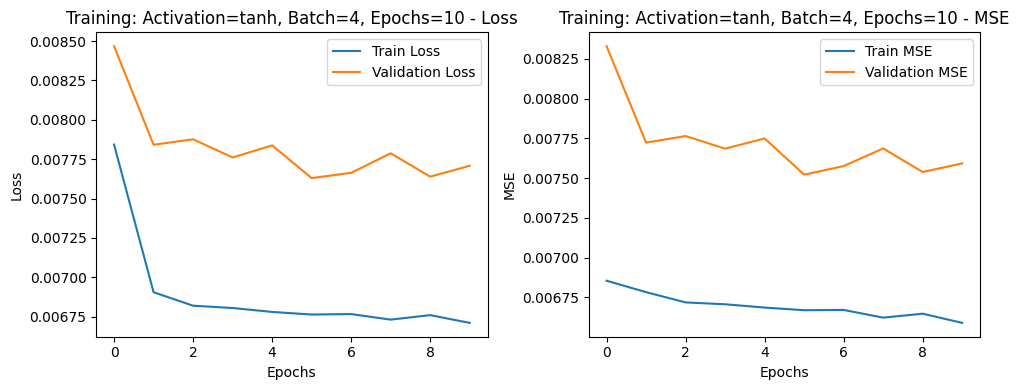

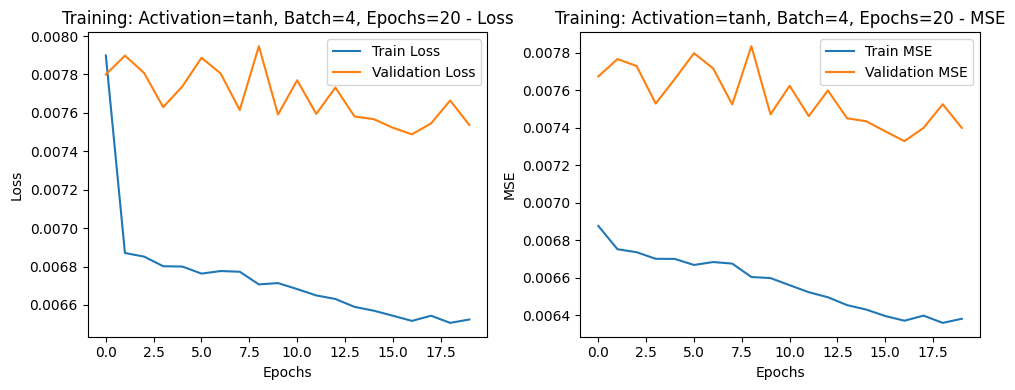

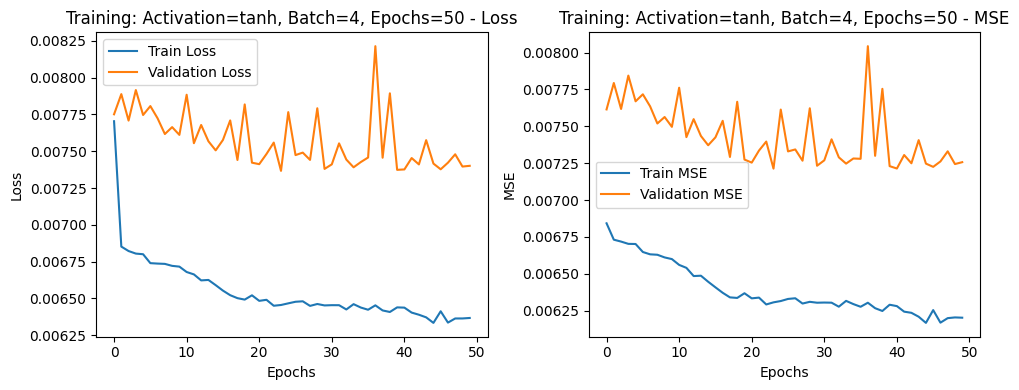

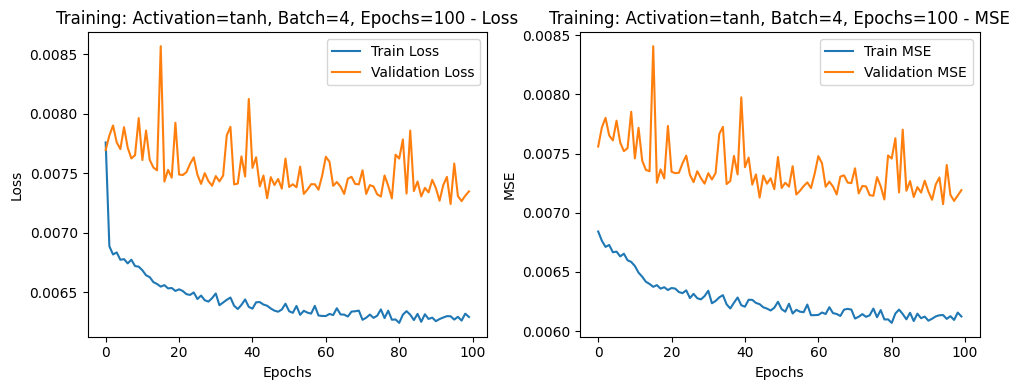

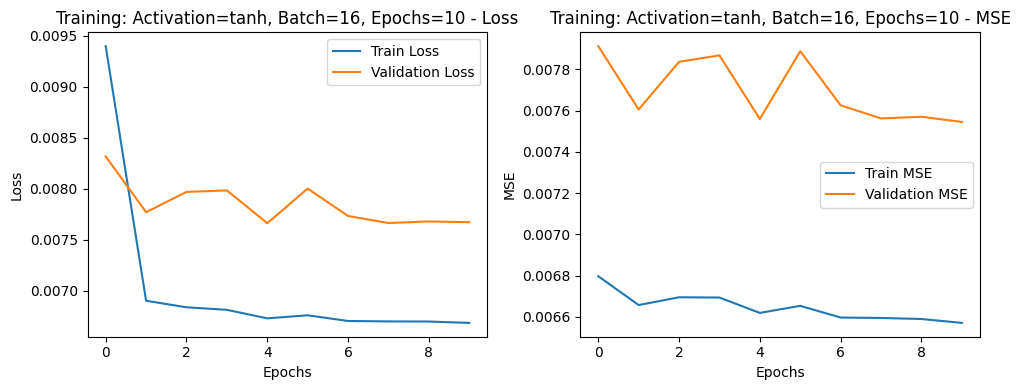

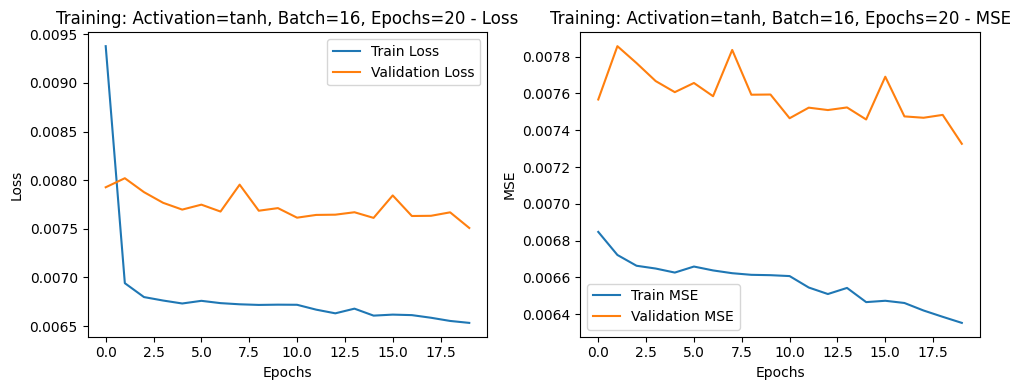

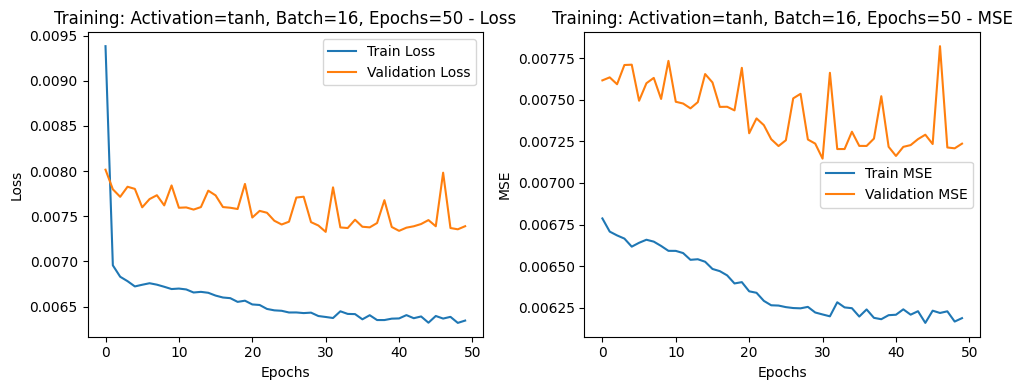

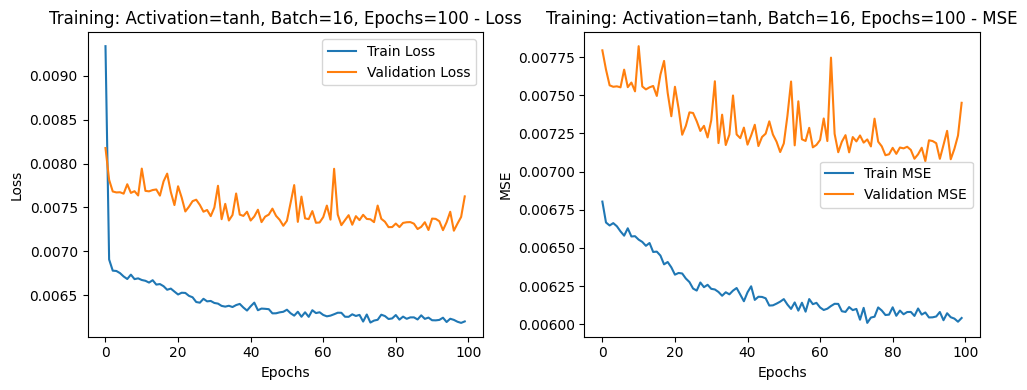

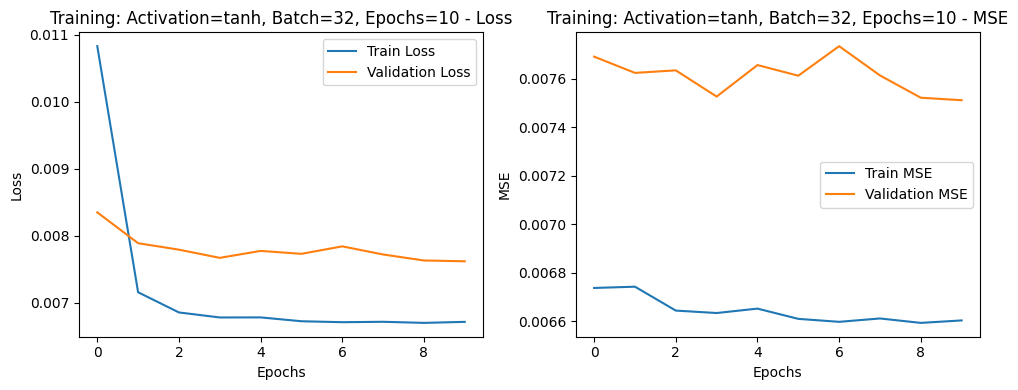

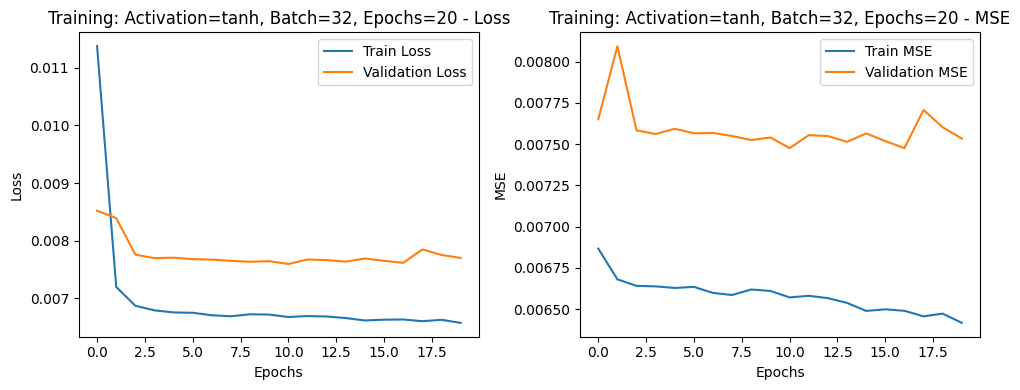

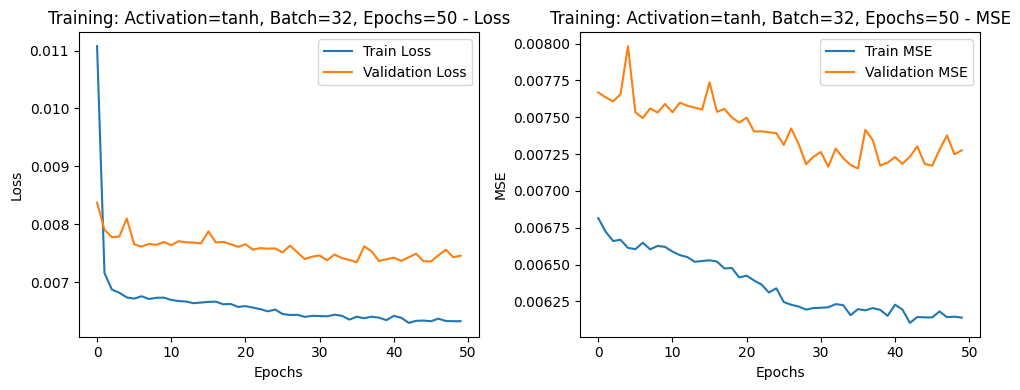

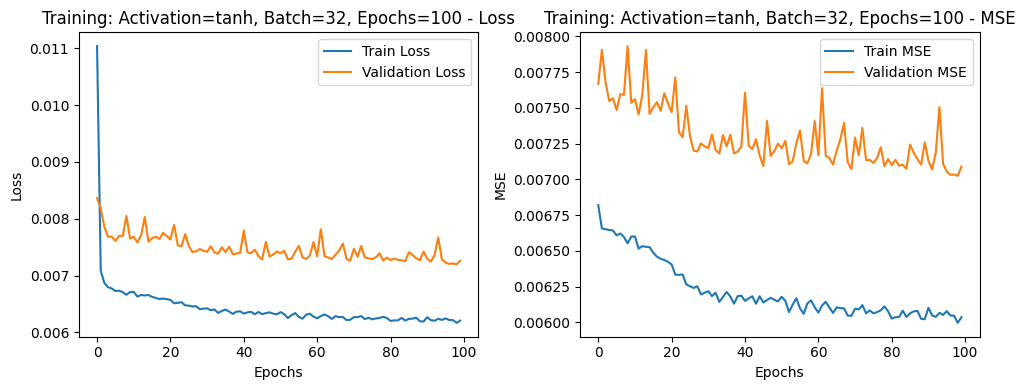

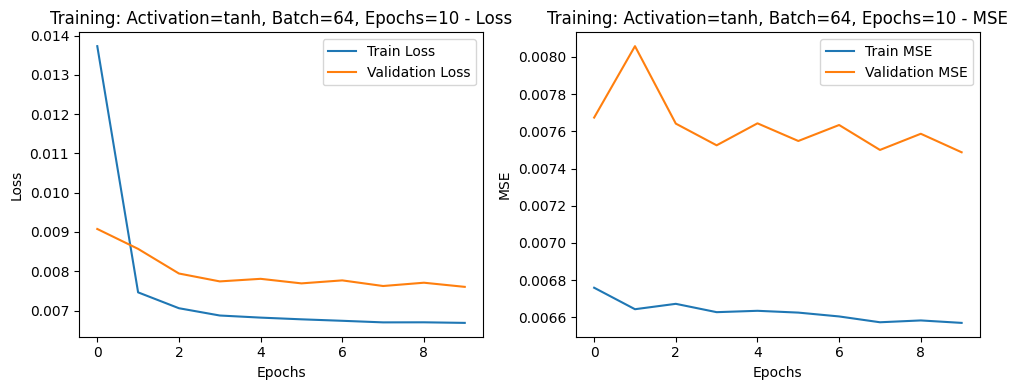

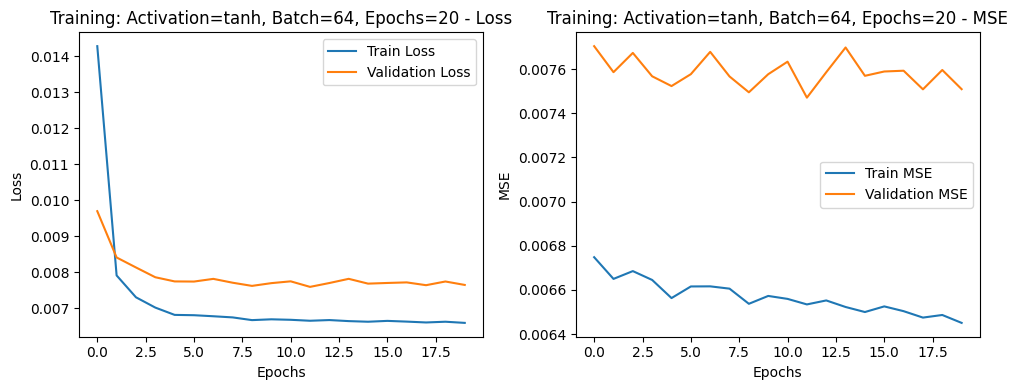

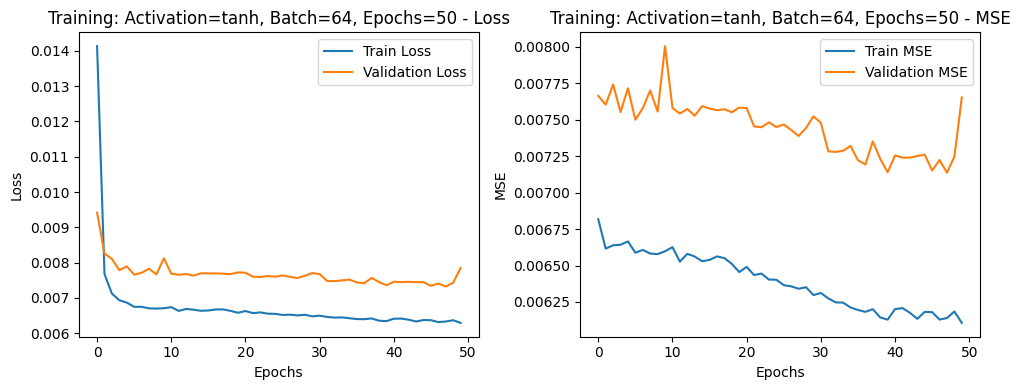

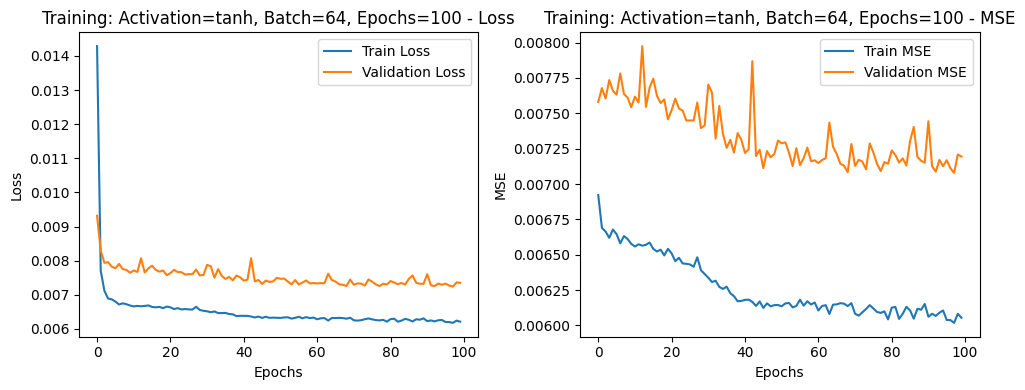

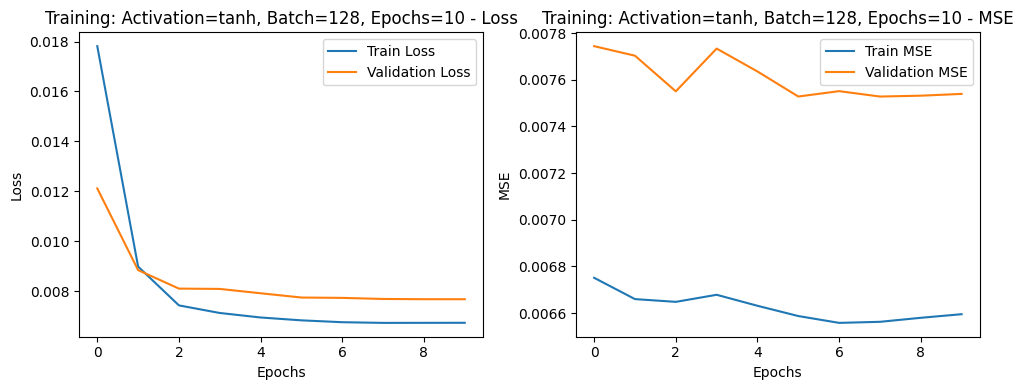

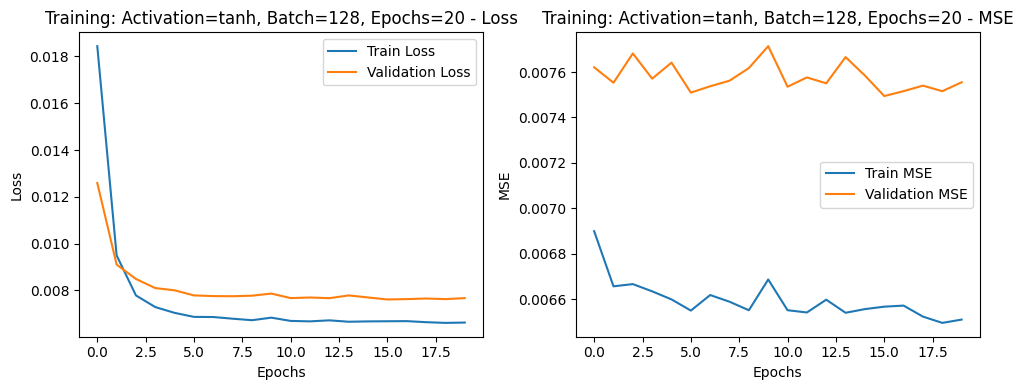

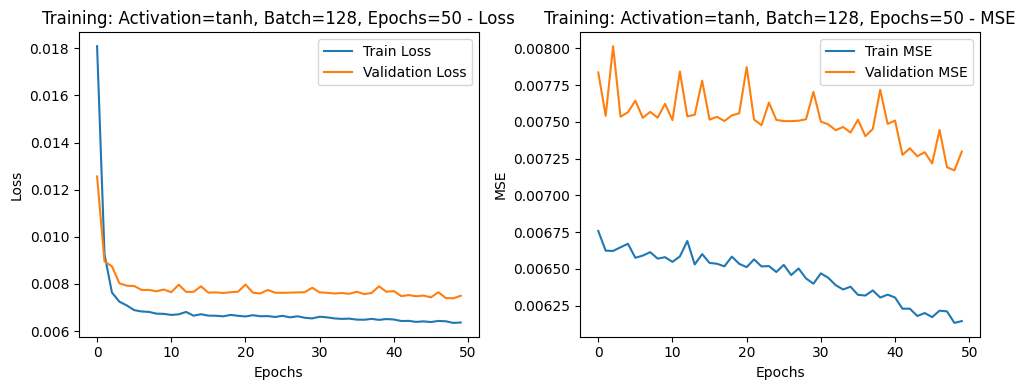

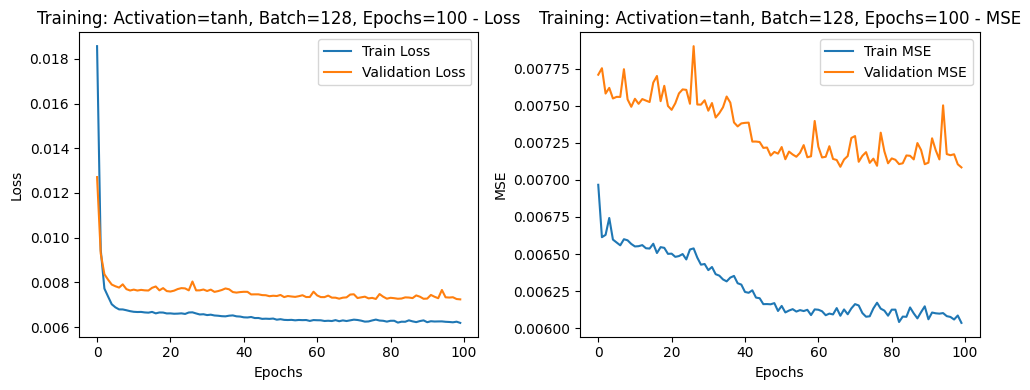

In [ ]:
import matplotlib.pyplot as plt

def visualize_training(history, title="Model Training"):
    plt.figure(figsize=(10, 4))

    # Plot untuk Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot untuk Mean Squared Error (MSE)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_squared_error'], label='Train MSE')
    plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
    plt.title(f'{title} - MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Visualisasi hasil pelatihan untuk setiap kombinasi parameter
for key, history in histories.items():
    activation_function, batch_size, epochs = key.split('_')
    visualize_training(history, f"Training: Activation={activation_function}, Batch={batch_size}, Epochs={epochs}")


In [ ]:
# Menampilkan hasil untuk setiap kombinasi parameter
for i in range(len(results_df)):
    print(f"Activation: {results_df['Activation'][i]}, Batch size: {results_df['Batch Size'][i]}, Epochs: {results_df['Epochs'][i]}")
    print(f"Train MSE: {results_df['Train MSE'][i]}")
    print(f"Train RMSE: {results_df['Train RMSE'][i]}")
    print(f"Validation MSE: {results_df['Validation MSE'][i]}")
    print(f"Validation RMSE: {results_df['Validation RMSE'][i]}\n")


Activation: tanh, Batch size: 4, Epochs: 10
Train MSE: 0.00653442507609725
Train RMSE: 0.08083579081135564
Validation MSE: 0.007521561812609434
Validation RMSE: 0.08672693821765781

Activation: tanh, Batch size: 4, Epochs: 20
Train MSE: 0.006178869865834713
Train RMSE: 0.07860578773751149
Validation MSE: 0.007327492348849773
Validation RMSE: 0.0856007730622205

Activation: tanh, Batch size: 4, Epochs: 50
Train MSE: 0.00612603360787034
Train RMSE: 0.0782689824123857
Validation MSE: 0.00721336342394352
Validation RMSE: 0.08493152196883981

Activation: tanh, Batch size: 4, Epochs: 100
Train MSE: 0.00590879749506712
Train RMSE: 0.0768687029620451
Validation MSE: 0.00707264756783843
Validation RMSE: 0.08409903428600372

Activation: tanh, Batch size: 16, Epochs: 10
Train MSE: 0.006542315240949392
Train RMSE: 0.08088457974762181
Validation MSE: 0.007559560239315033
Validation RMSE: 0.08694573157616786

Activation: tanh, Batch size: 16, Epochs: 20
Train MSE: 0.006179030518978834
Train RMSE: 0.

In [ ]:
# Menentukan model terbaik berdasarkan MSE pada data validasi
best_index = results_df['Validation MSE'].idxmin()
best_result = results_df.loc[best_index]

print("Model terbaik:")
print(best_result)


Model terbaik:
Activation             tanh
Batch Size                4
Epochs                  100
Train MSE          0.005909
Train RMSE         0.076869
Validation MSE     0.007073
Validation RMSE    0.084099
Name: 3, dtype: object


In [ ]:
  # Path untuk model dan history terbaik
  best_activation = best_result['Activation']
  best_batch_size = best_result['Batch Size']
  best_epochs = best_result['Epochs']

  best_model_path = f"/content/drive/My Drive/models/best_model_{best_activation}_bs{best_batch_size}_ep{best_epochs}.keras"
  best_model = load_model(best_model_path)


In [ ]:
# Prediksi data validasi menggunakan model terbaik
y_pred = best_model.predict(X_val)
actual_vs_pred = pd.DataFrame({'Actual': y_val.flatten(), 'Predicted': y_pred.flatten()})

# Menampilkan 5 baris pertama dari nilai aktual dan prediksi
print("5 Baris pertama dari nilai aktual dan prediksi (Model Terbaik):")
print(actual_vs_pred.head(5))


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
5 Baris pertama dari nilai aktual dan prediksi (Model Terbaik):
     Actual  Predicted
0  0.056552   0.087459
1  0.222069   0.059356
2  0.091724   0.109111
3  0.007586   0.091416
4  0.164138   0.107029


**Uji coba Model**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading best model from /content/drive/MyDrive/models/best_model_tanh_bs4_ep10.keras
Test MSE: 0.008777656592428684
Test RMSE: 0.09368914874428459
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


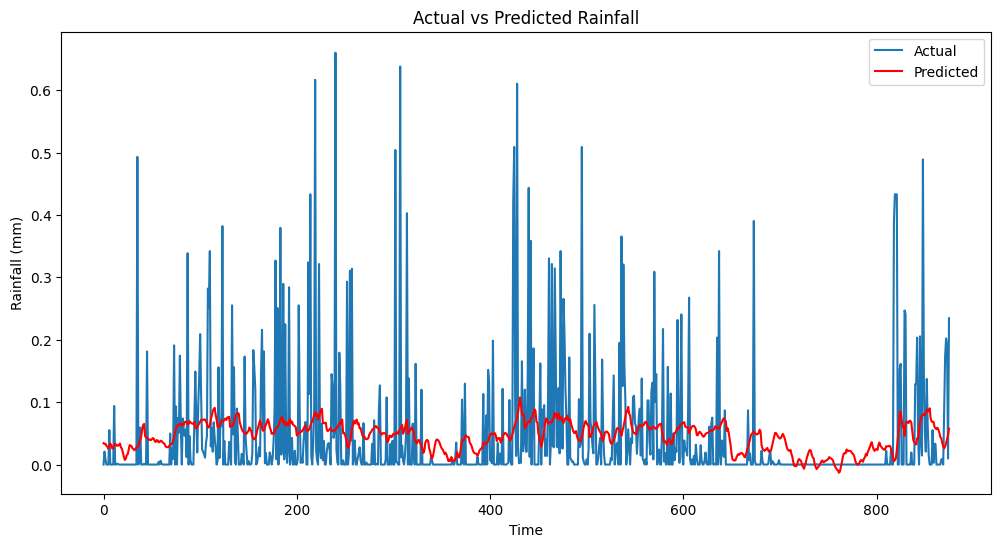

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import os
from google.colab import drive
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path model terbaik
best_model_path = "/content/drive/MyDrive/models/best_model_tanh_bs4_ep10.keras"  # Sesuaikan path dengan model terbaik Anda

# Memuat model terbaik
print(f"Loading best model from {best_model_path}")
best_model = load_model(best_model_path)

# Evaluasi model dengan data uji
test_loss, test_mse = best_model.evaluate(X_test, y_test, verbose=0)
test_rmse = np.sqrt(test_mse)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

# Prediksi menggunakan model terbaik
y_pred = best_model.predict(X_test)


# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()


plt.tight_layout()
plt.show()
